In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [11]:
#LOADING THE DATASET

wine = load_wine()
X = wine.data
y = wine.target

In [13]:
 df = pd.DataFrame(X, columns=wine.feature_names)

In [15]:
#INFO AND DESCRIPTION OF DATASET


print("Wine Dataset Description:\n",wine.DESCR)

print("\nFirst 5 Rows of Data:\n",df.head())

Wine Dataset Description:
 .. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                 

In [23]:
#SELECTING ONLY IMPORTING FEATURES

selected_features=['alcohol','malic_acid', 'flavanoids']
X_selected=df[selected_features]

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

In [27]:
# FEATURE STANDARDIZATION

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


In [33]:
# HYPERPARAMETER TUNING USING GRIDSEARCHCV

param_grid = {
             'criterion':['gini','entropy'],
          'max_depth':[3, 4, 5, 6],
           'min_samples_split':[2, 5, 10],
       'min_samples_leaf':[1, 2, 4] }
grid_search=GridSearchCV(DecisionTreeClassifier(random_state=44), param_grid, cv=7, scoring='accuracy')
grid_search.fit(X_train, y_train)


GridSearchCV(cv=7, estimator=DecisionTreeClassifier(random_state=44),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [35]:
#BEST PARAMETER 

best_params =grid_search.best_params_
print("Best Parameters:",best_params)

dt =DecisionTreeClassifier(**best_params,random_state=44)
dt.fit(X_train, y_train)


# GENERATING PREDICTIOIN ON TEST DATA

y_pred = dt.predict(X_test) 



Best Parameters: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [37]:
#MODEL CLASSIFICATION

print("\nClassification Report:\n",classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       0.92      0.86      0.89        14
           2       0.88      0.88      0.88         8

    accuracy                           0.92        36
   macro avg       0.91      0.91      0.91        36
weighted avg       0.92      0.92      0.92        36



In [39]:
# PREDICT AND ACCURACY 


y_pred=dt.predict(X_test)
accuracy=accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy:{accuracy:.2f}")


Model Accuracy:0.92


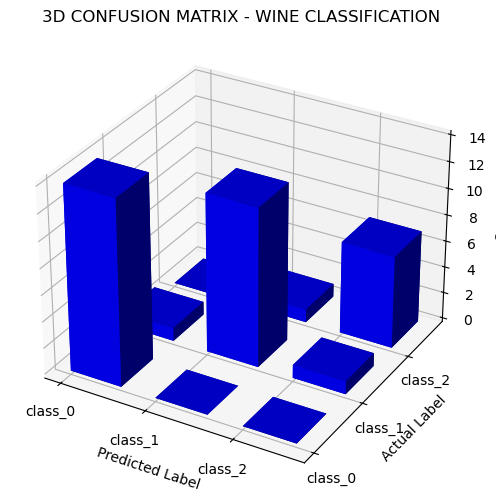

In [48]:
#IMPLEMENTATION OF CONFUSION MATRIX


conf_matrix=confusion_matrix(y_test, y_pred)
classes= wine.target_names
num_classes=len(classes)


 #3D CONFUSION MATRIX 

fig=plt.figure(figsize=(10, 6))
ax=fig.add_subplot(111, projection='3d')


  # Define x, y positions for each bar

x_pos,y_pos=np.meshgrid(range(num_classes), range(num_classes))
x_pos=x_pos.flatten()
y_pos=y_pos.flatten()
z_pos=np.zeros_like(x_pos)

 # HEIGHT OF MATRIX
heights=conf_matrix.flatten()


 # Set width and depth
dx=dy=0.6


# BAR PLOT
ax.bar3d(x_pos,y_pos, z_pos, dx, dy, heights, color='blue', alpha=1)

# SETTING LEBELS


ax.set_xlabel("Predicted Label")
ax.set_ylabel("Actual Label")
ax.set_zlabel("Count")
ax.set_xticks(range(num_classes))
ax.set_yticks(range(num_classes))
ax.set_xticklabels(classes)
ax.set_yticklabels(classes)
plt.title("3D CONFUSION MATRIX - WINE CLASSIFICATION")

plt.show()


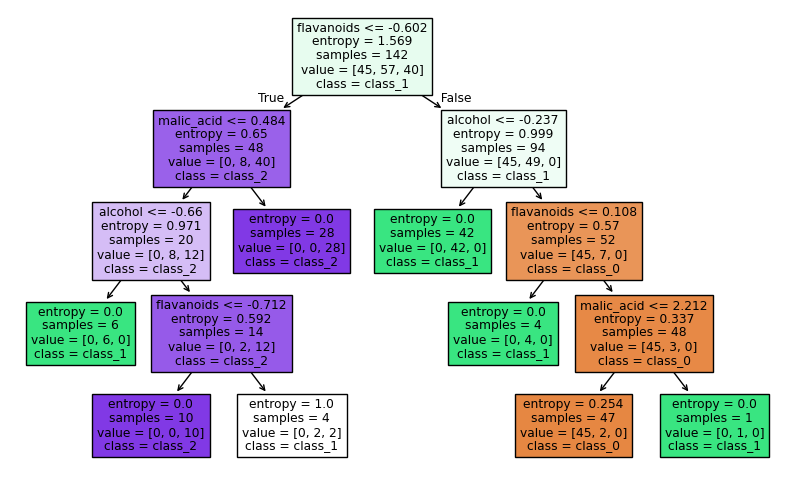

In [26]:
#Decision tree vizualization
plt.figure(figsize=(10, 6))
plot_tree(dt,feature_names=selected_features,class_names=wine.target_names , filled=True)
plt.show()